Camel 3 Function 
=====================


In [1]:
using Pkg
Pkg.activate("../../.")

# Load CairoMakie first to prevent Polynomials extension loading issues
using CairoMakie
CairoMakie.activate!()

# Now load other packages
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging

  Activating project at `~/globtim`
ERROR: LoadError: UndefVarError: `XYBased` not defined in `Makie`
Suggestion: check for spelling errors or missing imports.
Stacktrace:
 [1] getproperty(x::Module, f::Symbol)
   @ Base ./Base.jl:42
 [2] top-level scope
   @ ~/.julia/packages/Polynomials/13Ozz/ext/PolynomialsMakieExt.jl:6
 [3] include
   @ ./Base.jl:562 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base ./loading.jl:2881
 [5] top-level scope
   @ stdin:6
in expression starting at /Users/ghscholt/.julia/packages/Polynomials/13Ozz/ext/PolynomialsMakieExt.jl:1
in expression starting at stdin:6
┌ Error: Error during loading of extension PolynomialsMakieExt of Polynomials, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile PolynomialsMakieExt [6a4b1961-

We define the center and range of the square domain of approximation. 

In [2]:
# Constants and Parameters
const n, a, b = 2, 5, 1
const scale_factor = a / b
f = camel # Objective function
d = 6 # Initial Degree 
SMPL = 200   
println("Number of samples: ", SMPL^2)
TR = test_input(f, 
                dim = n,
                center = [0.0, 0.0],
                GN = SMPL, 
                sample_range = scale_factor
                )

Number of samples: 40000


test_input(2, [0.0, 0.0], 200, (0.1, 0.5), 0.002, (0.0, 0.0), 5.0, 1.0, 6, Globtim.camel)

The `Constructor` function computes the coefficients of the polynomial approximant in the basis specified, with `GN^2` samples distributed following the measure with respect to which the polynomial basis is orthogonal.
The `RationalPrecision` specifies that the conversion of the polynomial's coefficients from the tensorized orthogonal basis to the standard monomial basis is carried out in high precision. 

In [3]:
pol_cheb = Constructor(TR, d, basis=:chebyshev, precision=RationalPrecision)
pol_lege = Constructor(TR, d, basis=:legendre, precision=RationalPrecision, normalized=true);

current L2-norm: 5.403750270905881e-12
current L2-norm: 5.0293810818049854e-12


Note that with the `Legendre` polynomials, it is necessary to run with the `normalized` option to ensure that the polynomials are orthonormal with respect to the uniform measure on the domain of approximation.

In [4]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=pol_cheb.normalized,
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=pol_lege.normalized)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR);

Tracking 25 paths...   8%|██▍                           |  ETA: 0:00:35



Tracking 25 paths... 100%|██████████████████████████████| Time: 0:00:03
                   # paths tracked: 25
   # non-singular solutions (real): 25 (17)
       # singular endpoints (real): 0 (0)
          # total solutions (real): 25 (17)
Tracking 25 paths...   8%|██▍                           |  ETA: 0:00:08



Tracking 25 paths... 100%|██████████████████████████████| Time: 0:00:00
                   # paths tracked: 25
   # non-singular solutions (real): 25 (17)
       # singular endpoints (real): 0 (0)
          # total solutions (real): 25 (17)


In [5]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.00125);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.00125);

Processing point 1 of 15
Optimization has converged within bounds: ✓
Processing point 2 of 15
Optimization has converged within bounds: ✓
Processing point 3 of 15
Optimization has converged within bounds: ✓
Processing point 4 of 15
Optimization has converged within bounds: ✓
Processing point 5 of 15
Optimization has converged within bounds: ✓
Processing point 6 of 15
Optimization has converged within bounds: ✓
Processing point 7 of 15
Optimization has converged within bounds: ✓
Processing point 8 of 15
Optimization has converged within bounds: ✓
Processing point 9 of 15
Optimization has converged within bounds: ✓
Processing point 10 of 15
Optimization has converged within bounds: ✓
Processing point 11 of 15
Optimization has converged within bounds: ✓
Processing point 12 of 15
Optimization has converged within bounds: ✓
Processing point 13 of 15
Optimization has converged within bounds: ✓
Processing point 14 of 15
Optimization has converged within bounds: ✓
Processing point 15 of 15
Opt

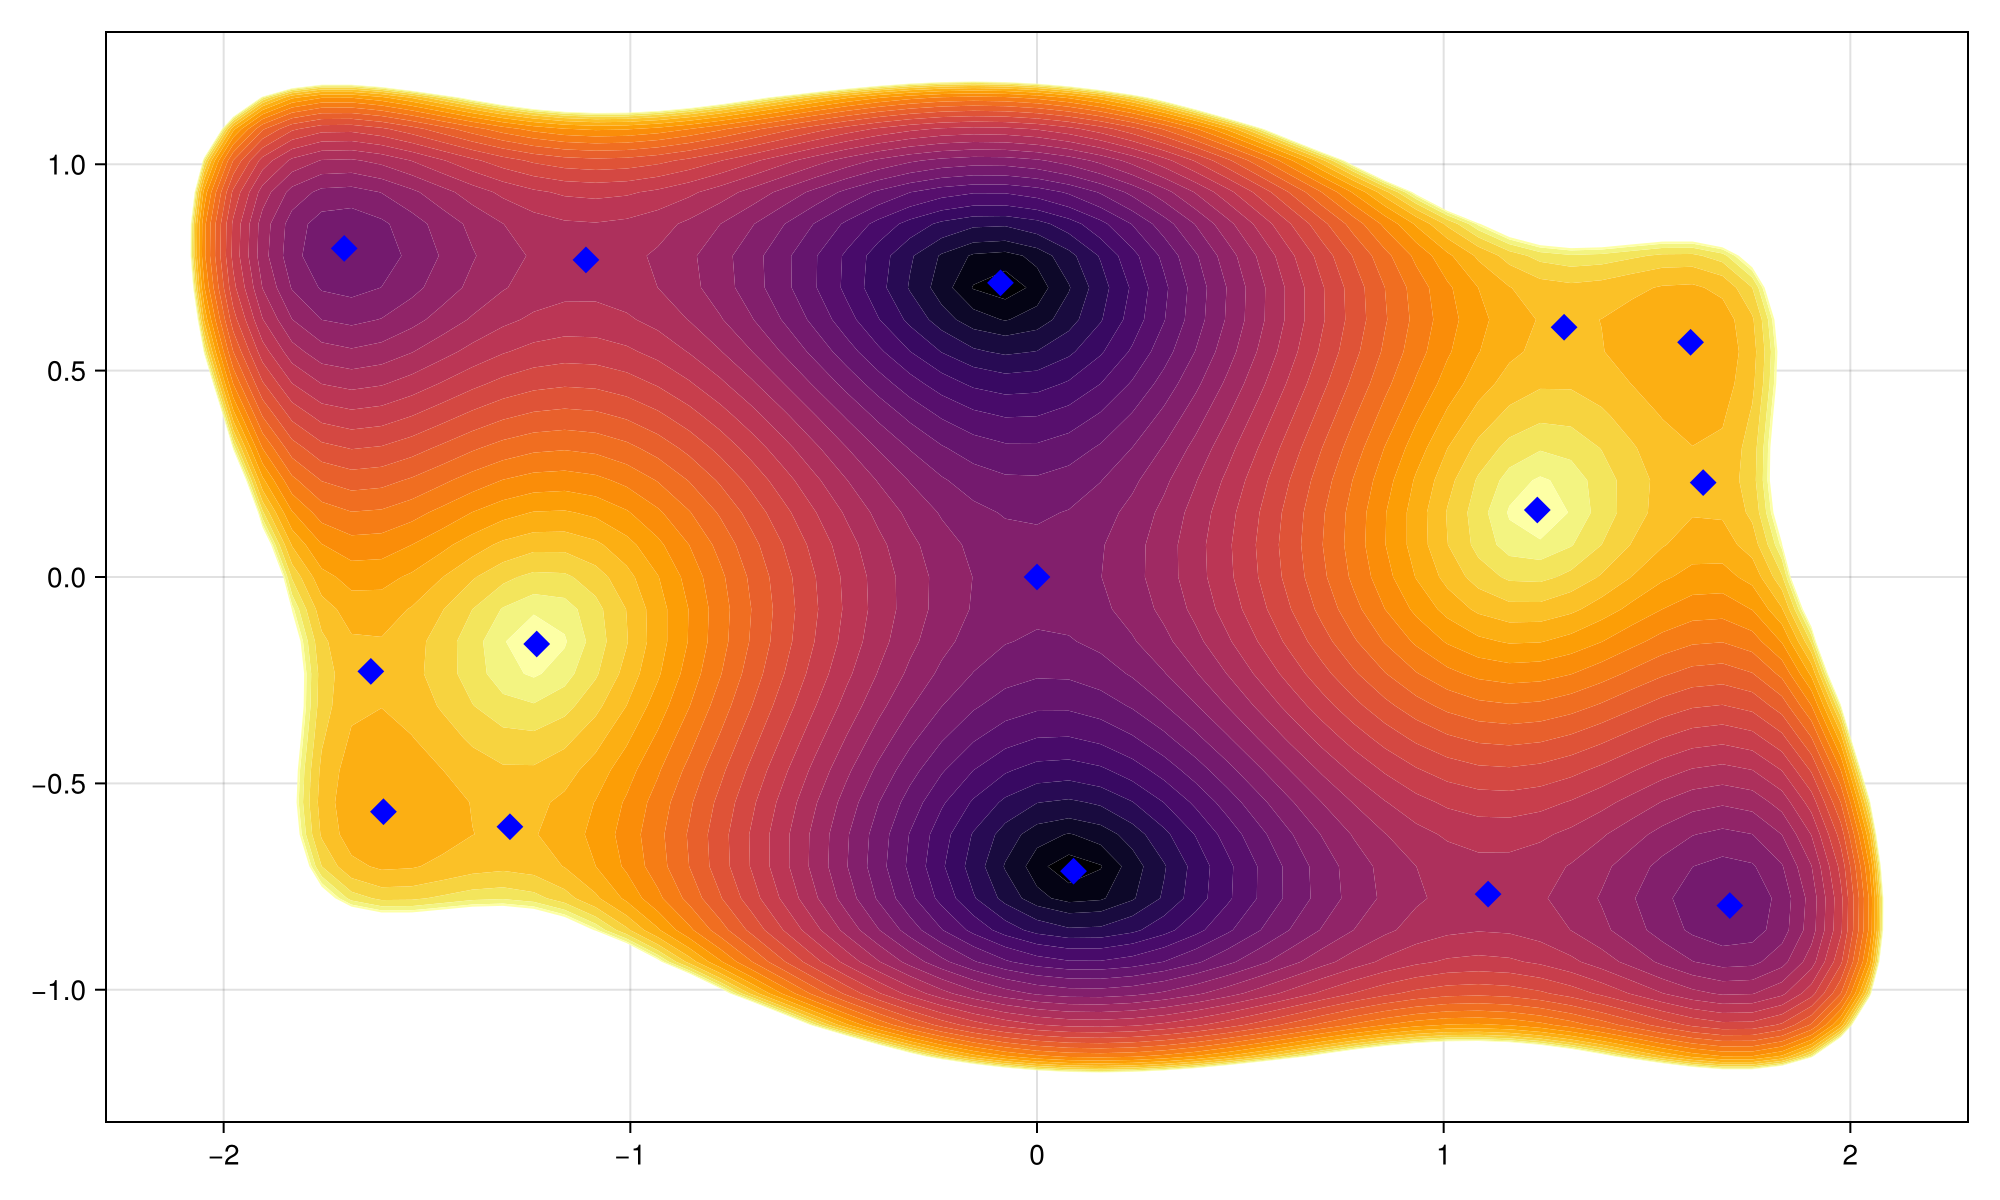

In [6]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true)

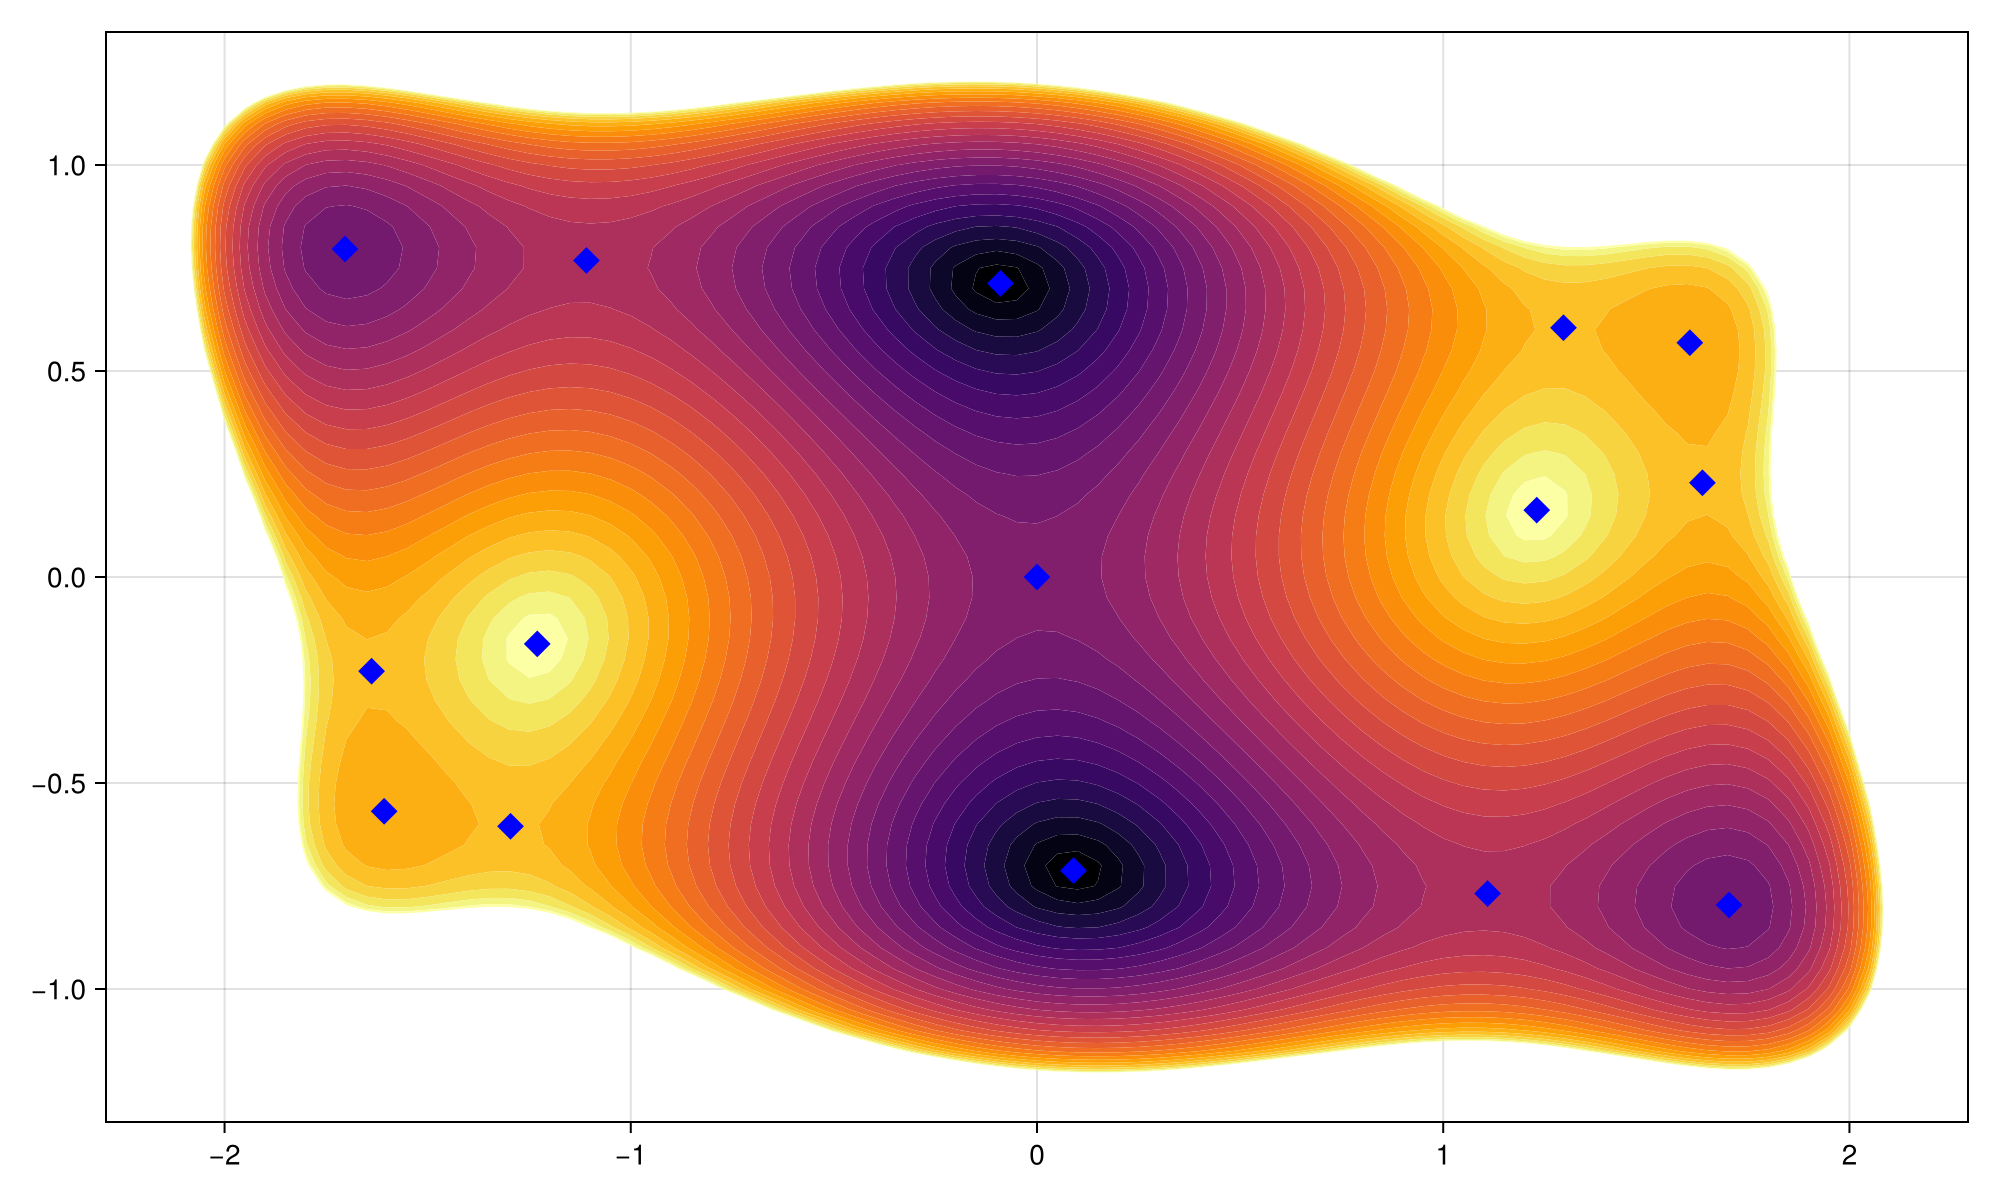

In [7]:
fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true)
# Commented out save command
# save("camel_lege_levelset.pdf", fig_2)